**1. Persoa que realiza a resolución do traballo**

Adrián Quiroga Linares

**2.  Función, gráfica e intervalo de traballo**

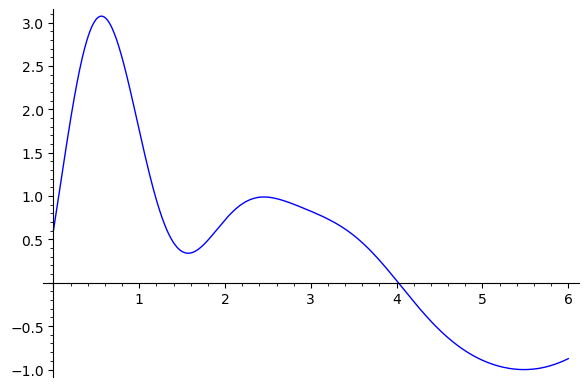

In [4]:
f(x)=ℯ^(-x+2.5) *sin(x+0.5)^3* cos(x+6.5)+sin(x+5.5)
a=0
b=6
plot(f,a,b)

**3. Cálculo da raíz por dicotomía**

In [5]:
dicotomia(f,a,b)[0:2]

(4.01968650769300, 43)

**4. Gráfica dos iterantes de dicotomía e os intervalos encaixados**

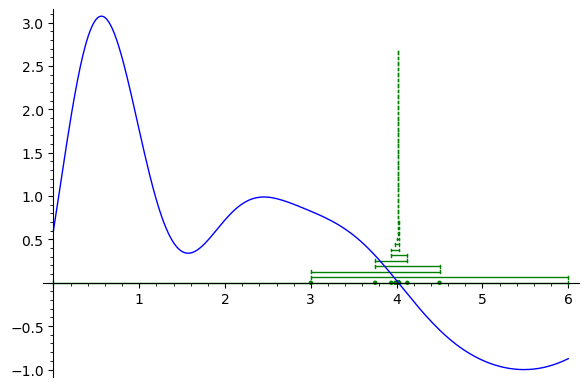

In [6]:
 _,_,v,I = dicotomia(f, a, b)
debuxa_dicotomia(f, a, b, v, I)

**5. Número máximo de iterantes**

In [9]:
kmax=lambda a,b,xtol:ceil(log((b-a)/xtol,2))
kmax(a,b,xtol=1e-12)

43

**6. Xustificación se o número de iteracións na práctica é coherente co número máximo de iterantes**

Como o número de iteracións (43),  menor ou igual ao número máximo (43), podo aseguar que un resultado coherente.

**7. Cálculo da raíz por Newton**

In [10]:
newton(f, diff(f), 3.1)[0:2]

(4.01968650769305, 8)

**8. Gráfica dos iterantes de Newton e as tanxentes do método

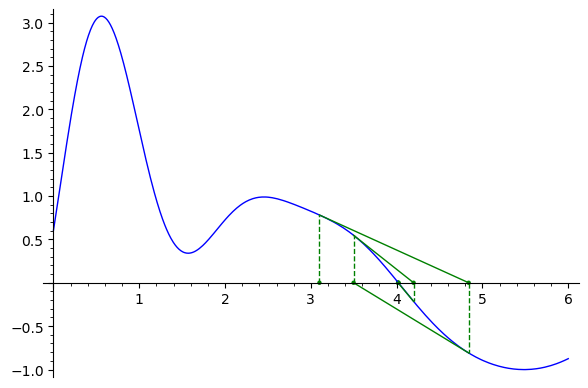

In [11]:
_,_,v = newton(f, diff(f), 3.1)
debuxa_newton(f, a, b, v)

**9. Gráfica das constantes de converxencia**

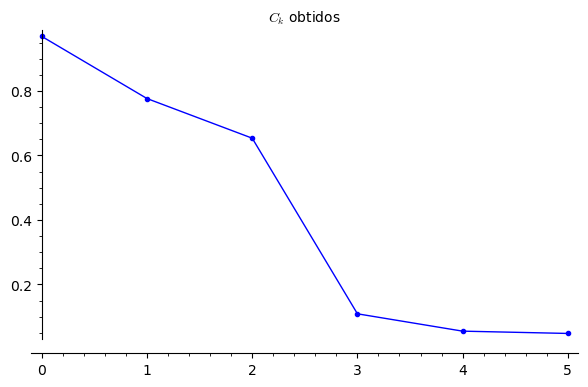

In [12]:
coef_newton(f, a, b, v)

**10. Xustificación de se neste caso hai converxencia**

Hai converxencia cuadrática posto que os coeficientes converxen cara valores moi próximos ao 0 a medida que medra o índice dos iterantes calculados.

**Anexo. Funcións de clase**

In [3]:
def dicotomia(f, a,b, xtol=1e-12, rtol=1e-14):
    r=a
    k=0
    v=[]
    I=[] 
    if abs(f(a)).n()<rtol:
        r=a.n(); return r,k,v,I
    
    elif abs(f(b)).n()<rtol:
        r=b.n(); return r,k,v,I
    
    elif (f(a)*f(b)).n()>0:
        raise RuntimeError('Extremos de igual signo.')
        
    while abs(b-a)>xtol:
        r=(a+b).n()/2
        k=k+1
        v.append(r)
        I.append((a,b))
        
        if abs(f(r)).n()<rtol:
            return r,k,v,I
        elif (f(a)*f(r)).n()<0:
            b=r
            
        else:
            a=r
            
    return r,k,v,I

def debuxa_dicotomia(f, a, b, v, I):
    p = plot(f, a, b) + point(zip(v,[0]*len(v)), color='green')
    h = (p.ymax() - p.ymin())/(1.5*len(v))
    show(sum(line([(a,h*i),    (b,h*i)],     color='green') + \
             line([(a,h*i-h/4),(a,h*i+h/4)], color='green') + \
             line([(b,h*i-h/4),(b,h*i+h/4)], color='green')   \
             for i, (a,b) in enumerate(I)) + p, xmin=a, xmax=b)
    
def newton(f, df, x0, xtol=1e-12, rtol=1e-14, M=1000, errorM=False):
    v = [x0.n()]
    for k in range(M):
        dfx = df(v[k]).n()
        if abs(dfx) < rtol:
            raise RuntimeError('Derivada nula.')
        r = (v[k] - f(v[k]) / dfx).n()
        v.append(r)
        # test de parada
        if abs(r-v[k]) < xtol or abs(f(r)).n() < rtol:
            return r, len(v), v
    if errorM: raise RuntimeError('Excedido numero maximo de iteracions.')
    return r, len(v), v

def debuxa_newton(f, a, b, v):
    show(plot(f, a, b) + point(zip(v,[0]*len(v)), color='green') + \
    sum(line([(v[i],0),(v[i],f(v[i]))], color='green', linestyle='--') for i in range(len(v))) + \
    sum(line([(v[i-1],f(v[i-1])), (v[i],0)], color='green') for i in range(1,len(v))), xmin=a, xmax=b)
    
def coef_newton(f, a, b, v):
    """COEF_NEWTON    Calcula os coeficientes de converxencia de Newton."""
    alpha = find_root(f, a, b, xtol=9.e-16, rtol=9.e-16) #aproximamos "ao máximo" a raíz
    pts = []
    for k in range(len(v)-1):
        if (alpha - v[k])^2 > RDF.epsilon():
            pts.append( (k, abs(alpha - v[k+1]) / (alpha - v[k])^2 ) )
    return line(pts, marker = '.', title='$C_k$ obtidos')